In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import least_squares
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import SIR_utils as sir

In [2]:
mandate = pd.read_csv('stay_at_home_and_masks.csv')
def get_date(dataframe, state):
    state = dataframe.loc[dataframe['state'] == state]
    date = np.array(state['mask_date'])[0].split('-')[::-1]
    return date[0] + '-' + date[1] + '-' + date[2]

print(mandate)

   state   mask_date  mask_in_effect mask_end_date stay_at_home_start  \
0     AL  16-07-2021           False    09-04-2021         04-04-2020   
1     AK         NaN           False           NaN         28-03-2020   
2     AZ         NaN           False           NaN         31-03-2020   
3     AR  20-07-2020           False    25-03-2021                NaN   
4     CA  18-06-2020            True           NaN         19-03-2020   
5     CO  17-07-2021            True    03-05-2021         26-03-2020   
6     CT  14-08-2020            True    19-05-2021         23-03-2020   
7     DE  05-01-2021            True           NaN         24-03-2020   
8     DC  22-07-2020            True           NaN         01-04-2020   
9     FL         NaN           False           NaN         03-04-2020   
10    GA         NaN           False           NaN         03-04-2020   
11    HI  17-04-2020            True           NaN         25-03-2020   
12    ID         NaN           False           NaN 

In [3]:
state = "new-jersey"
state_abbr = "NJ"

time_dataframe = pd.read_csv("{}-history.csv".format(state))
#print(time_dataframe)

dates = time_dataframe["date"][::-1]
removed = time_dataframe["positiveCasesViral"][::-1]
indices = np.array(1 - np.isnan(removed)).astype(np.bool)

dates = np.array(dates)[indices]
rem = np.array(removed[indices])

print(dates)
print(rem)

['2020-03-05' '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09'
 '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14'
 '2020-03-15' '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19'
 '2020-03-20' '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24'
 '2020-03-25' '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29'
 '2020-03-30' '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03'
 '2020-04-04' '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08'
 '2020-04-09' '2020-04-10' '2020-04-11' '2020-04-12' '2020-04-13'
 '2020-04-14' '2020-04-15' '2020-04-16' '2020-04-17' '2020-04-18'
 '2020-04-19' '2020-04-20' '2020-04-21' '2020-04-22' '2020-04-23'
 '2020-04-24' '2020-04-25' '2020-04-26' '2020-04-27' '2020-04-28'
 '2020-04-29' '2020-04-30' '2020-05-01' '2020-05-02' '2020-05-03'
 '2020-05-04' '2020-05-05' '2020-05-06' '2020-05-07' '2020-05-08'
 '2020-05-09' '2020-05-10' '2020-05-11' '2020-05-12' '2020-05-13'
 '2020-05-14' '2020-05-15' '2020-05-16' '2020-05-17' '2020-05-18'
 '2020-05-

<ipython-input-3-76399c1efc11>:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = np.array(1 - np.isnan(removed)).astype(np.bool)


In [4]:
window = 14
infectious, infectious_rate = sir.compute_number_infectious(rem, window)

rem = rem[:len(infectious)]

population = 8e7
sus = population - infectious - rem
print(sus)

354
[79999945.14285715 79999932.71428572 79999901.5        79999857.71428572
 79999782.92857143 79999722.64285715 79999664.21428572 79999479.14285715
 79999316.71428572 79999133.         79998952.85714285 79998646.42857143
 79998416.64285715 79998012.         79997483.14285715 79997038.21428572
 79996330.35714285 79995543.78571428 79994424.14285715 79993414.92857143
 79992524.07142857 79989970.35714285 79987906.21428572 79985516.92857143
 79983152.28571428 79979939.14285715 79977723.42857143 79974261.07142857
 79970858.07142857 79966635.57142857 79962497.71428572 79959081.
 79955501.71428572 79952157.5        79949103.85714285 79945475.71428572
 79942011.42857143 79938465.28571428 79934779.42857143 79932087.14285715
 79927959.42857143 79925739.         79921587.64285715 79918481.35714285
 79915558.78571428 79911738.78571428 79908375.21428572 79904884.
 79901561.78571428 79897607.71428572 79895428.42857143 79892222.57142857
 79888855.28571428 79886757.92857143 79884223.5        79881929

In [5]:
times = np.arange(len(rem))
sus_fit = sus / population
inf_fit = infectious / population
rem_fit = rem / population
sir_fitting = sir.moving_averages_fits(times, sus_fit, inf_fit, rem_fit, window=window, 
                                     a_guess=1, b_guess=0.1, opt_options={"method":"L-BFGS-B", 
                                                                           "bounds": 
                                                                            [(1e-10, 100), (0, np.inf)]})

In [6]:
print(sir_fitting)

[[0.42096834 0.01450417]
 [0.2340525  0.00579671]
 [0.94542695 1.10883285]
 [1.17041912 1.3654581 ]
 [1.24230676 1.42337688]
 [1.17937852 1.37162916]
 [1.28975424 1.48333881]
 [0.95193171 1.11147179]
 [0.98169604 1.14361469]
 [1.2505253  1.45094688]
 [1.01043967 1.17603103]
 [1.09595868 1.27022202]
 [0.21309906 1.61327713]
 [1.32750437 1.58058752]
 [1.23275881 1.47757987]
 [1.32198832 1.57519548]
 [1.20805499 1.45565908]
 [1.2086385  1.47316147]
 [1.28968623 1.52655537]
 [1.31894501 1.56996521]
 [1.36718533 1.60469706]
 [1.30931399 1.55864073]
 [1.25757808 1.45738979]
 [1.23960461 1.42715593]
 [1.40093988 1.62393964]]


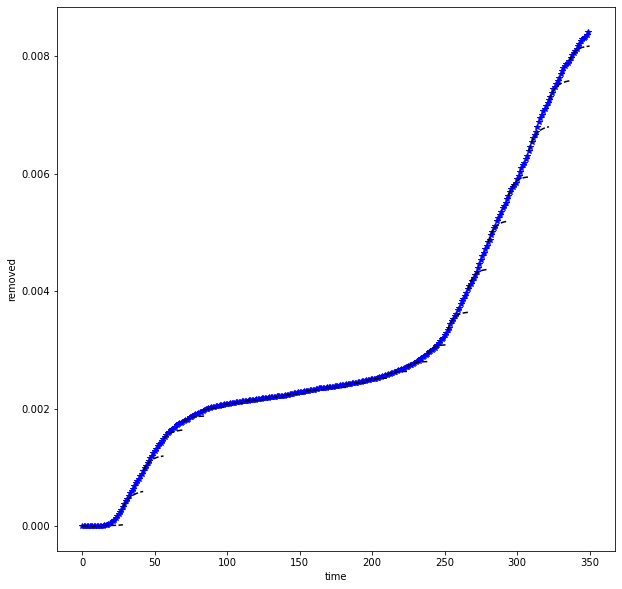

In [7]:
plt.figure(figsize=(10, 10))
for j in range(int(len(times) / window)):
    start = j * window
    stop = start + window
    plt.plot(times[start:stop], rem_fit[start:stop], "b*")
    sol = solve_ivp(sir.sir_ode, [times[start], times[stop]], 
                   [sus_fit[start], inf_fit[start], rem_fit[start]], 
                   args=sir_fitting[j, :], method="LSODA", max_step=0.25)
    plt.plot(sol.t, sol.y[2, :], "k--")
    
plt.xlabel("time")
plt.ylabel("removed")
plt.show()

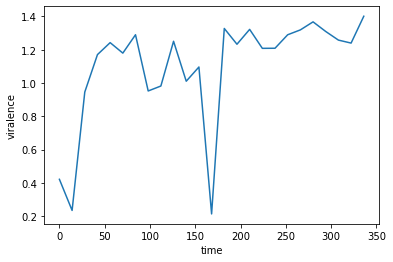

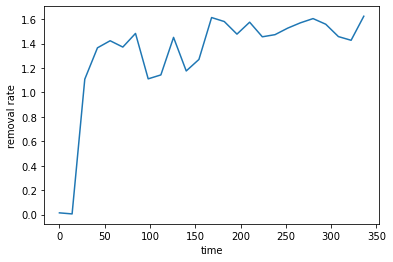

In [8]:
plt.plot(times[::window][:-1], sir_fitting[:, 0])
plt.xlabel("time")
plt.ylabel("viralence")
plt.show()

plt.plot(times[::window][:-1], sir_fitting[:, 1])
plt.xlabel("time")
plt.ylabel("removal rate")
plt.show()